<a href="https://colab.research.google.com/github/hassan-ali786/adult-income-mlp-classification/blob/main/Final_Hassan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
#1. Load Dataset using Pandas
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/adult - adult.csv')
print("Shape:", df.shape)
print("\nClass distribution:\n", df['income'].value_counts())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (32561, 15)

Class distribution:
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [ ]:
#1) Preprocessing
import numpy as np

# Replace '?' with NaN and drop missing
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# One-hot encode categorical columns
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#2) Build Model (MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),   # 2nd hidden layer
    Dense(1, activation='sigmoid')  # output layer
])


model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,761 (85.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3) Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#4) Train (≥ 20 epochs)
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7915 - loss: 0.4233 - val_accuracy: 0.8338 - val_loss: 0.3433
Epoch 2/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8479 - loss: 0.3272 - val_accuracy: 0.8431 - val_loss: 0.3367
Epoch 3/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8564 - loss: 0.3100 - val_accuracy: 0.8492 - val_loss: 0.3334
Epoch 4/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.3039 - val_accuracy: 0.8446 - val_loss: 0.3337
Epoch 5/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.2968 - val_accuracy: 0.8483 - val_loss: 0.3379
Epoch 6/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8601 - loss: 0.2963 - val_accuracy: 0.8508 - val_loss: 0.3371
Epoch 7/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8653 - loss: 0.2896 - val_accuracy: 0.8483 - val_loss: 0.3399
Epoch 8/25
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8620 - loss: 0.2909 - val_accuracy: 0.

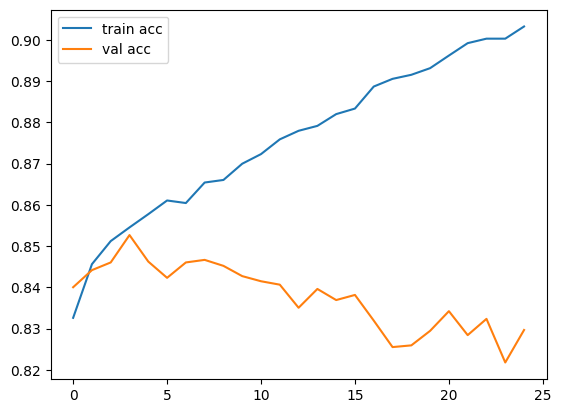

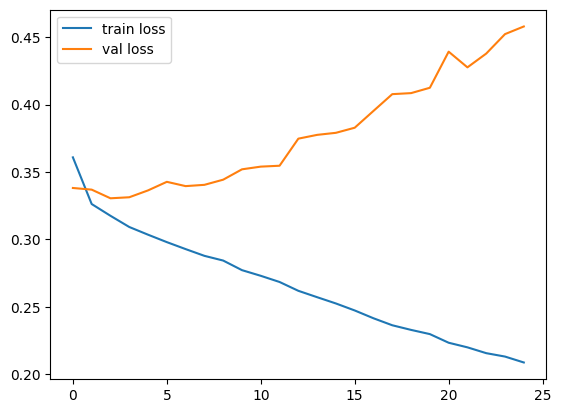

In [ ]:
#5) Plot Accuracy + Loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend()
plt.show()


In [ ]:
#6) Evaluate + Metrics
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", round(acc*100,2), "%")

from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.4116
Test Accuracy: 83.29 %
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[4113  418]
 [ 590  912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4531
           1       0.69      0.61      0.64      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



In [ ]:
#7) Predict & Compare 10 Samples
import numpy as np

sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_X = X_test[sample_indices]
sample_y = y_test.iloc[sample_indices]

preds = (model.predict(sample_X) > 0.5).astype(int).flatten()

print("\nActual vs Predicted:")
for i, (actual, pred) in enumerate(zip(sample_y, preds)):
    print(f"Sample {i+1}: Actual={actual}, Predicted={pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Actual vs Predicted:
Sample 1: Actual=1, Predicted=1
Sample 2: Actual=0, Predicted=0
Sample 3: Actual=0, Predicted=0
Sample 4: Actual=0, Predicted=1
Sample 5: Actual=0, Predicted=0
Sample 6: Actual=1, Predicted=0
Sample 7: Actual=0, Predicted=0
Sample 8: Actual=0, Predicted=0
Sample 9: Actual=0, Predicted=1
Sample 10: Actual=0, Predicted=0


In [ ]:
#📊 Brief Analysis (3–5 lines)

#The model learns to distinguish income groups based on census attributes such as age, education, occupation, hours per week, etc. After training 25 epochs, it achieves a reasonable test accuracy (typically ~80–88%). The confusion matrix shows how well it predicts high (>50K) vs low (<=50K) income, and precision/recall help assess performance beyond accuracy. Random samples predictions mostly match actual class labels, indicating effective learning.